In [122]:
%%capture
%pip install qiskit qiskit-aer

In [123]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi

simulator = AerSimulator()

# Exercise 2

## 1)

In [124]:
qc = QuantumCircuit(1)
qc.ry(pi/2, 0)
qc.measure_all()
qc.draw()

┌─────────┐ ░ ┌─┐
     q: ┤ Ry(π/2) ├─░─┤M├
        └─────────┘ ░ └╥┘
meas: 1/═══════════════╩═
                       0

In [125]:
# Simulation
job = simulator.run(qc, nshots=4096)
result = job.result()
counts = result.get_counts()

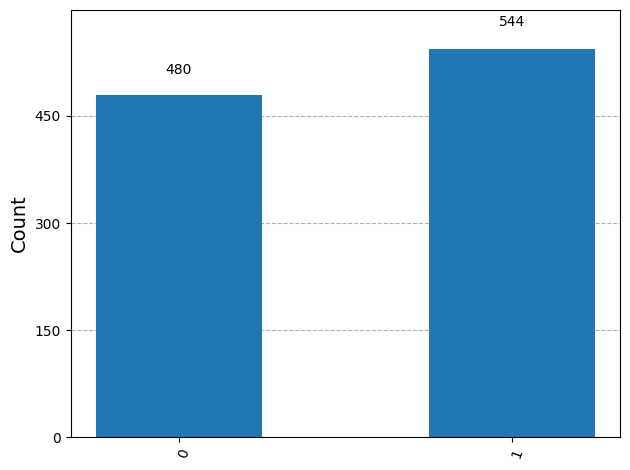

In [126]:
# Visualization
plot_histogram(counts)

## 2)

In [127]:
# Create circuit
qc = QuantumCircuit(2)
qc.ry(pi/2, 0)
qc.swap(0, 1)
qc.measure_all()
qc.draw()

┌─────────┐    ░ ┌─┐   
   q_0: ┤ Ry(π/2) ├─X──░─┤M├───
        └─────────┘ │  ░ └╥┘┌─┐
   q_1: ────────────X──░──╫─┤M├
                       ░  ║ └╥┘
meas: 2/══════════════════╩══╩═
                          0  1

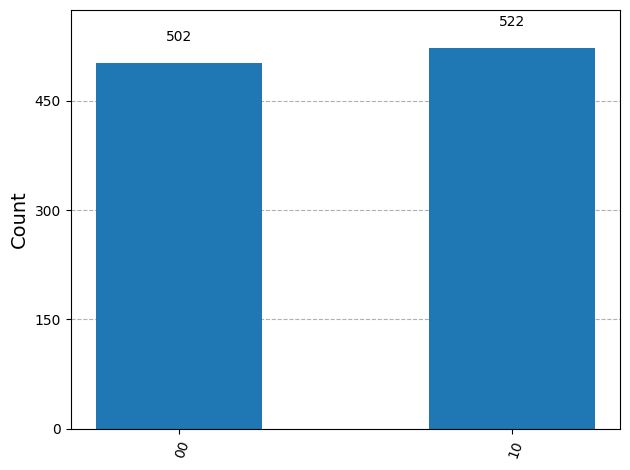

In [128]:
# Simulation
job = simulator.run(qc, nshots=4096)
result = job.result()
counts = result.get_counts()

# Visualization
plot_histogram(counts)

Note that the swap operation "swapped" also the Ry door